# WeatherPy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from scipy.stats import linregress


# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [2]:
# empty list for holding the latitude and longitude combinations
lat_lngs = []

# empty dict for holding the cities names
city_dict = {}

# range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = list(zip(lats, lngs))

# Identify nearest city for each random lat, lng combination and get lat and lng for city
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1])
    city_name = city.city_name
    coords = (city.lat, city.lng)
    # if the city is unique, then add it to a our cities dict
    if city_name not in city_dict:
        city_dict[city_name] = coords

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(city_dict)}")

Number of cities in the list: 590


## Plots Showing the Relationship Between Weather Variables and Latitude

In [3]:
# define base url and api key
api_key = weather_api_key
base_url = "http://api.openweathermap.org/data/2.5/weather?"
# empty list to fetch the weather data for each city
city_data = []

# print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# create counters
record_count = 1
set_count = 1

# loop through all the cities in our dict to fetch weather data
for i, (city_name, (lat, lng)) in enumerate(city_dict.items()):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    # create URL to fetch    
    city_url = f"{base_url}lat={lat}&lon={lng}&appid={api_key}"
        
    # log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city_name))

    # add 1 to the record count
    record_count += 1
    
    # run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()
     
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather.get("coord", {}).get("lat")
        city_lng = city_weather.get("coord", {}).get("lon")
        city_max_temp = city_weather.get("main", {}).get("temp_max")
        city_humidity = city_weather.get("main", {}).get("humidity")
        city_clouds = city_weather.get("clouds", {}).get("all")
        city_wind = city_weather.get("wind", {}).get("speed")
        city_country = city_weather.get("sys", {}).get("country")
        city_date = city_weather.get("dt")
    
        # slow down to keep at 60 requests per minuet
        time.sleep(1)
            
        # Append the City information into city_data list
        city_data.append({"City": city_name, 
                            "Lat": city_lat, 
                            "Lng": city_lng, 
                            "Max Temp": city_max_temp,
                            "Humidity": city_humidity,
                            "Cloudiness": city_clouds,
                            "Wind Speed": city_wind,
                            "Country": city_country,
                            "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | waitangi
Processing Record 2 of Set 1 | gerash
Processing Record 3 of Set 1 | puerto penasco
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | tankara
Processing Record 6 of Set 1 | ovalle
Processing Record 7 of Set 1 | badger
Processing Record 8 of Set 1 | jinzhou
Processing Record 9 of Set 1 | al kharijah
Processing Record 10 of Set 1 | adamstown
Processing Record 11 of Set 1 | quechultenango
Processing Record 12 of Set 1 | susuman
Processing Record 13 of Set 1 | whitehorse
Processing Record 14 of Set 1 | ribeira grande
Processing Record 15 of Set 1 | papatowai
Processing Record 16 of Set 1 | twon-brass
Processing Record 17 of Set 1 | dakar
Processing Record 18 of Set 1 | hailar
Processing Record 19 of Set 1 | albany
Processing Record 20 of Set 1 | brunswick
Processing Record 21 of Set 1 | grytviken
Processing Record 22 of Set 1 | la passe
Processing Record 23 of Set 1 | bet

In [4]:
# convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# show counts
city_data_df.count()

City          590
Lat           590
Lng           590
Max Temp      590
Humidity      590
Cloudiness    590
Wind Speed    590
Country       586
Date          590
dtype: int64

In [5]:
# change temp from kelvin to celsius
city_data_df["Max Temp"] = city_data_df['Max Temp'] - 273.15
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waitangi,-43.9535,-176.5597,11.01,80,5,1.79,NZ,1717124271
1,gerash,27.6697,54.1359,24.18,16,1,0.37,IR,1717124272
2,puerto penasco,31.3172,-113.5380,26.06,73,0,0.45,MX,1717124273
3,ushuaia,-54.8108,-68.3159,1.14,69,0,4.12,AR,1717124274
4,tankara,22.6562,70.7495,31.46,55,39,6.80,IN,1717124287


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,11.01,80,5,1.79,NZ,1717124271
1,gerash,27.6697,54.1359,24.18,16,1,0.37,IR,1717124272
2,puerto penasco,31.3172,-113.5380,26.06,73,0,0.45,MX,1717124273
3,ushuaia,-54.8108,-68.3159,1.14,69,0,4.12,AR,1717124274
4,tankara,22.6562,70.7495,31.46,55,39,6.80,IN,1717124287


## Scatter Plots
#### Latitude Vs. Temperature

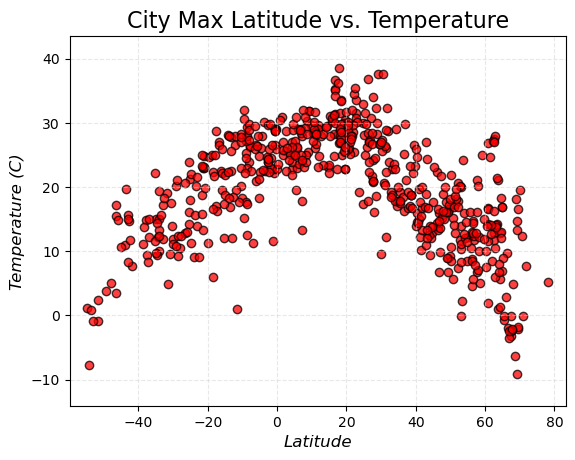

In [10]:
# Build scatter plot for latitude vs. temperature
# get data
x_axis = city_data_df["Lat"]
temp = city_data_df["Max Temp"]

# create canvas
plt.scatter(x_axis, temp, marker="o", facecolors="red", edgecolors="black",
            alpha=0.75)

# customize
plt.xlabel("Latitude", fontsize=12, fontstyle="italic")
plt.ylabel("Temperature (C)", fontsize=12, fontstyle="italic")
plt.title("City Max Latitude vs. Temperature", fontsize=16)
plt.xlim(x_axis.min() - 5, x_axis.max() + 5)
plt.ylim(temp.min() - 5, temp.max() + 5)
plt.grid(color="lightgrey", linestyle="--", alpha=.5)


# Show plot
plt.show()

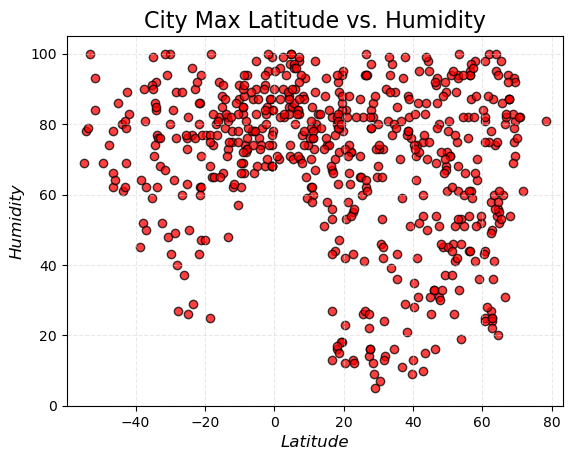

In [11]:
# Build scatter plot for latitude vs. humidity
# get data
x_axis = city_data_df["Lat"]
humidity = city_data_df["Humidity"]

# create canvas
plt.scatter(x_axis, humidity, marker="o", facecolors="red", edgecolors="black",
             alpha=0.75)

# customize
plt.xlabel("Latitude", fontsize=12, fontstyle="italic")
plt.ylabel("Humidity", fontsize=12, fontstyle="italic")
plt.title("City Max Latitude vs. Humidity", fontsize=16)
plt.xlim(x_axis.min() - 5, x_axis.max() + 5)
plt.ylim(humidity.min() - 5, humidity.max() + 5)
plt.grid(color="lightgrey", linestyle="--", alpha=.5)

# show plot
plt.show()

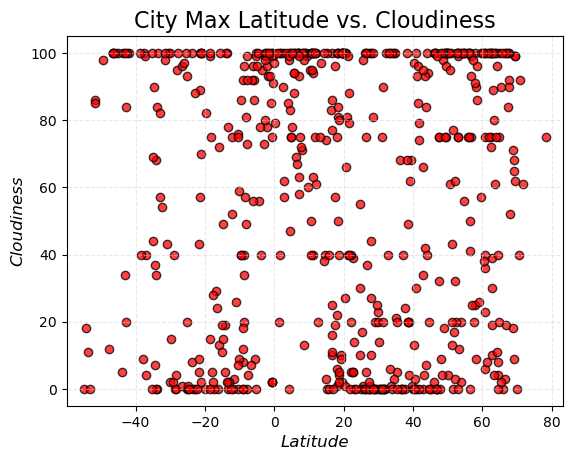

In [12]:
# Build scatter plot for latitude vs. cloudiness
# get data
x_axis = city_data_df["Lat"]
couldiness = city_data_df["Cloudiness"]

# create canvas
plt.scatter(x_axis, couldiness, marker="o", facecolors="red", edgecolors="black",
            alpha=0.75)

# customize
plt.xlabel("Latitude", fontsize=12, fontstyle="italic")
plt.ylabel("Cloudiness", fontsize=12, fontstyle="italic")
plt.title("City Max Latitude vs. Cloudiness", fontsize=16)
plt.xlim(x_axis.min() - 5, x_axis.max() + 5)
plt.ylim(couldiness.min() - 5, couldiness.max() + 5)
plt.grid(color="lightgrey", linestyle="--", alpha=.5)

# Show plot
plt.show()

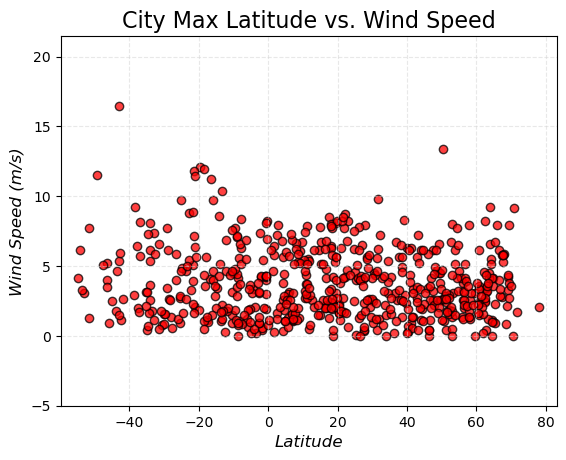

In [13]:
# Build scatter plot for latitude vs. Wind Speed
# get data
x_axis = city_data_df["Lat"]
wind_speed = city_data_df["Wind Speed"]

# create canvas
plt.scatter(x_axis, wind_speed, marker="o", facecolors="red", edgecolors="black",
            alpha=0.75)

# customize
plt.xlabel("Latitude", fontsize=12, fontstyle="italic")
plt.ylabel("Wind Speed (m/s)", fontsize=12, fontstyle="italic")
plt.title("City Max Latitude vs. Wind Speed", fontsize=16)
plt.xlim(x_axis.min() - 5, x_axis.max() + 5)
plt.ylim(wind_speed.min() - 5, wind_speed.max() + 5)
plt.grid(color="lightgrey", linestyle="--", alpha=.5)

# Show plot
plt.show()

## Linear Regression for Each Relationship

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,gerash,27.6697,54.1359,24.18,16,1,0.37,IR,1717124272
2,puerto penasco,31.3172,-113.5380,26.06,73,0,0.45,MX,1717124273
4,tankara,22.6562,70.7495,31.46,55,39,6.80,IN,1717124287
6,badger,64.8000,-147.5333,16.95,52,75,4.12,US,1717124289
7,jinzhou,39.1000,121.7167,22.12,51,62,8.33,CN,1717124290


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,11.01,80,5,1.79,NZ,1717124271
3,ushuaia,-54.8108,-68.3159,1.14,69,0,4.12,AR,1717124274
5,ovalle,-30.6011,-71.1990,17.45,48,100,0.76,CL,1717124288
9,adamstown,-25.0660,-130.1015,21.20,73,93,9.75,PN,1717124304
14,papatowai,-46.5607,169.4707,15.47,62,100,5.21,NZ,1717124321


The r-value is -0.7653562580943984


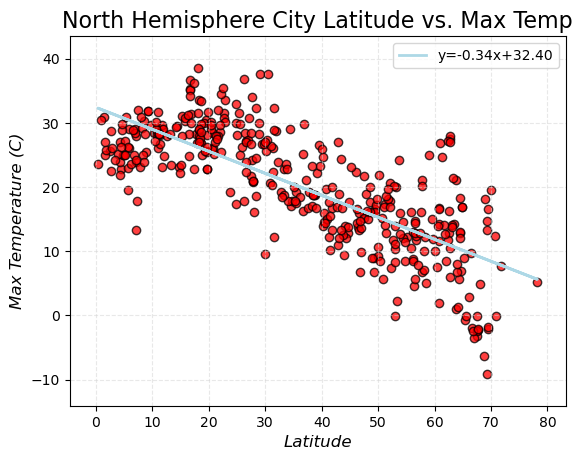

In [16]:
# Northern Hemisphere line regression
# get axis
northern_lat = northern_hemi_df["Lat"]
northern_temp = northern_hemi_df["Max Temp"]

# create canvas
plt.scatter(northern_lat, northern_temp, marker="o", facecolors="red", edgecolors="black",
            alpha=0.75)
# use linear regression formula to plot line of best fit
slope, intercept, r_value, p_value, std_err = linregress(northern_lat, northern_temp)
regression_line = slope * northern_lat + intercept

plt.plot(northern_lat, regression_line, color='lightblue', linewidth=2, label=f"y={slope:.2f}x+{intercept:.2f}")

# customize
plt.xlabel("Latitude", fontsize=12, fontstyle="italic")
plt.ylabel("Max Temperature (C)", fontsize=12, fontstyle="italic")
plt.title("North Hemisphere City Latitude vs. Max Temp", fontsize=16)
plt.xlim(northern_lat.min() - 5, northern_lat.max() + 5)
plt.ylim(northern_temp.min() - 5, northern_temp.max() + 5)
plt.grid(color="lightgrey", linestyle="--", alpha=.5)
plt.legend()

# show 
print(f"The r-value is {r_value}")
plt.show()

The r-value is 0.7519621564212665


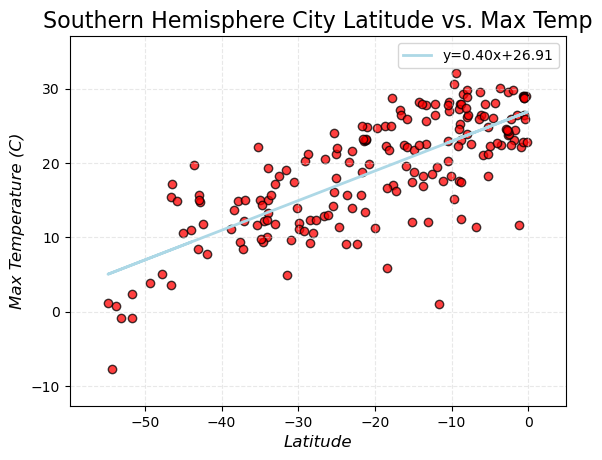

In [17]:
# Linear regression on Southern Hemisphere
# get axis
southern_lat = southern_hemi_df["Lat"]
southern_temp = southern_hemi_df["Max Temp"]

#create canvas
plt.scatter(southern_lat, southern_temp, marker="o", facecolors="red", edgecolors="black",
            alpha=0.75)

# use linear regression formula to plot line of best fit
slope, intercept, r_value, p_value, std_err = linregress(southern_lat, southern_temp)
regression_line = slope * southern_lat + intercept

plt.plot(southern_lat, regression_line, color='lightblue', linewidth=2, label=f"y={slope:.2f}x+{intercept:.2f}")

# customize
plt.xlabel("Latitude", fontsize=12, fontstyle="italic")
plt.ylabel("Max Temperature (C)", fontsize=12, fontstyle="italic")
plt.title("Southern Hemisphere City Latitude vs. Max Temp", fontsize=16)
plt.xlim(southern_lat.min() - 5, southern_lat.max() + 5)
plt.ylim(southern_temp.min() - 5, southern_temp.max() + 5)
plt.grid(color="lightgrey", linestyle="--", alpha=.5)
plt.legend()

print(f"The r-value is {r_value}")
plt.show()

##### Discussion about the linear relationship:
The r values for these graphs are both closer to 1 or -1 respectively then .5 or -.5, showing a strong correlation between distance from the equator and temperature. Close to the equator it is very likely to have higher max temperature and vise versa.

#### Humidity vs. Latitude Linear Regression Plot

The r-value is -0.14099920929606788


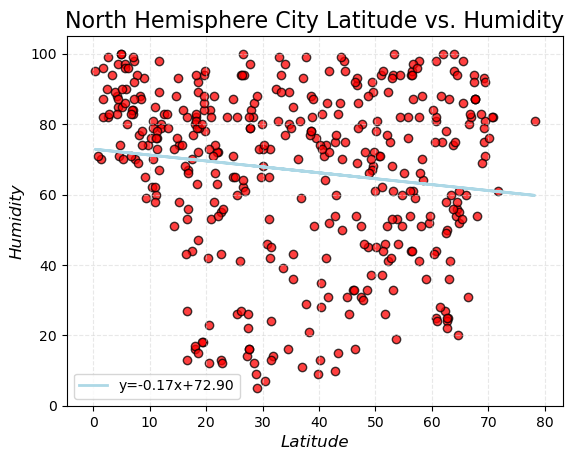

In [18]:
# Northern Hemisphere
# get axis
northern_lat = northern_hemi_df["Lat"]
northern_humidity = northern_hemi_df["Humidity"]

# create canvas
plt.scatter(northern_lat, northern_humidity, marker="o", facecolors="red", edgecolors="black",
             alpha=0.75)

# use linear regression formula to plot line of best fit
slope, intercept, r_value, p_value, std_err = linregress(northern_lat, northern_humidity)
regression_line = slope * northern_lat + intercept

plt.plot(northern_lat, regression_line, color='lightblue', linewidth=2, label=f"y={slope:.2f}x+{intercept:.2f}")

# customize
plt.xlabel("Latitude", fontsize=12, fontstyle="italic")
plt.ylabel("Humidity", fontsize=12, fontstyle="italic")
plt.title("North Hemisphere City Latitude vs. Humidity", fontsize=16)
plt.xlim(northern_lat.min() - 5, northern_lat.max() + 5)
plt.ylim(northern_humidity.min() - 5, northern_humidity.max() + 5)
plt.grid(color="lightgrey", linestyle="--", alpha=.5)
plt.legend()

# Show plot
print(f"The r-value is {r_value}")
plt.show()

The r-value is 0.16274912565657074


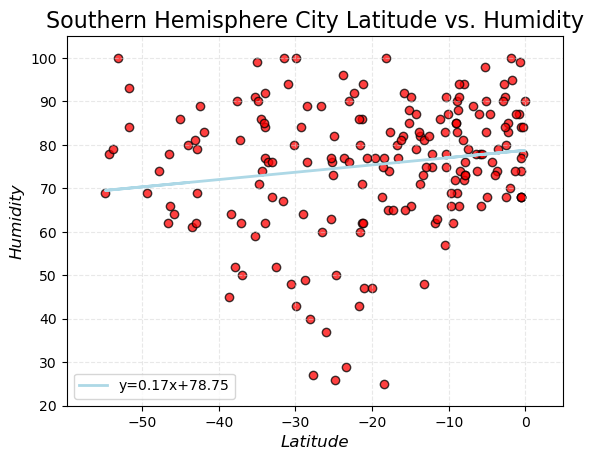

In [19]:
# 
# get axis
southern_lat = southern_hemi_df["Lat"]
southern_humidity = southern_hemi_df["Humidity"]

# create canvas
plt.scatter(southern_lat, southern_humidity, marker="o", facecolors="red", edgecolors="black",
            alpha=0.75)

# use linear regression formula to plot line of best fit
slope, intercept, r_value, p_value, std_err = linregress(southern_lat, southern_humidity)
regression_line = slope * southern_lat + intercept

plt.plot(southern_lat, regression_line, color='lightblue', linewidth=2, label=f"y={slope:.2f}x+{intercept:.2f}")

# customize
plt.xlabel("Latitude", fontsize=12, fontstyle="italic")
plt.ylabel("Humidity", fontsize=12, fontstyle="italic")
plt.title("Southern Hemisphere City Latitude vs. Humidity", fontsize=16)
plt.xlim(southern_lat.min() - 5, southern_lat.max() + 5)
plt.ylim(southern_humidity.min() - 5, southern_humidity.max() + 5)
plt.grid(color="lightgrey", linestyle="--", alpha=.5)
plt.legend()

# Show plot
print(f"The r-value is {r_value}")
plt.show()

##### Discussion about the linear relationship:
There is a weak linear relationship between latitude and humidity. From these r values you can see little to no correlation but as the line of regression is trending closer to 0. Humidity does not have a relationship with the latidude of a city. 

#### Cloudiness vs. Latitude Linear Regression Plot

The r-value is -0.057323034937455684


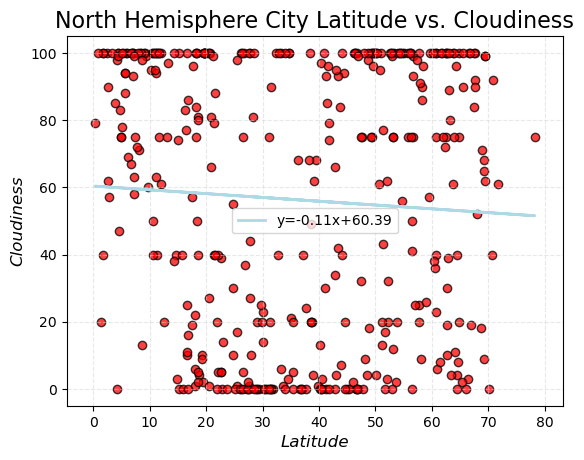

In [20]:
# Northern Hemisphere
# get axis
northern_lat = northern_hemi_df["Lat"]
northern_cloudiness = northern_hemi_df["Cloudiness"]

# create canvas
plt.scatter(northern_lat, northern_cloudiness, marker="o", facecolors="red", edgecolors="black",
            alpha=0.75)

# use linear regression formula to plot line of best fit
slope, intercept, r_value, p_value, std_err = linregress(northern_lat, northern_cloudiness)
regression_line = slope * northern_lat + intercept

plt.plot(northern_lat, regression_line, color='lightblue', linewidth=2, label=f"y={slope:.2f}x+{intercept:.2f}")

# customize
plt.xlabel("Latitude", fontsize=12, fontstyle="italic")
plt.ylabel("Cloudiness", fontsize=12, fontstyle="italic")
plt.title("North Hemisphere City Latitude vs. Cloudiness", fontsize=16)
plt.xlim(northern_lat.min() - 5, northern_lat.max() + 5)
plt.ylim(northern_cloudiness.min() - 5, northern_cloudiness.max() + 5)
plt.grid(color="lightgrey", linestyle="--", alpha=.5)
plt.legend()

# Show plot
print(f"The r-value is {r_value}")
plt.show()

The r-value is 0.05593737344621196


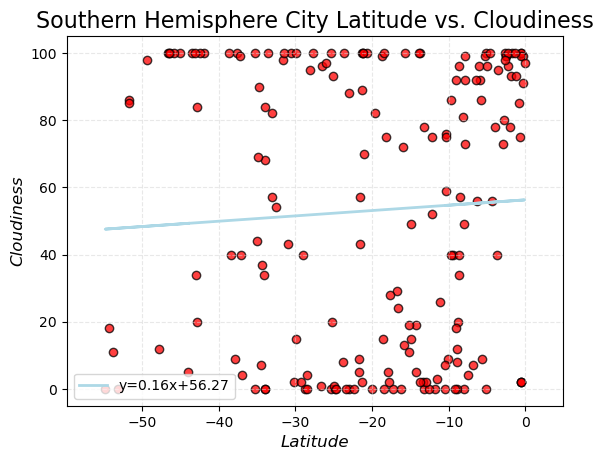

In [21]:
# Southern Hemisphere
# get axis
southern_lat = southern_hemi_df["Lat"]
southern_cloudiness = southern_hemi_df["Cloudiness"]

# create canvas
plt.scatter(southern_lat, southern_cloudiness, marker="o", facecolors="red", edgecolors="black",
            alpha=0.75)

# use linear regression formula to plot line of best fit
slope, intercept, r_value, p_value, std_err = linregress(southern_lat, southern_cloudiness)
regression_line = slope * southern_lat + intercept

plt.plot(southern_lat, regression_line, color='lightblue', linewidth=2, label=f"y={slope:.2f}x+{intercept:.2f}")

# customize
plt.xlabel("Latitude", fontsize=12, fontstyle="italic")
plt.ylabel("Cloudiness", fontsize=12, fontstyle="italic")
plt.title("Southern Hemisphere City Latitude vs. Cloudiness", fontsize=16)
plt.xlim(southern_lat.min() - 5, southern_lat.max() + 5)
plt.ylim(southern_cloudiness.min() - 5, southern_cloudiness.max() + 5)
plt.grid(color="lightgrey", linestyle="--", alpha=.5)
plt.legend()

# Show plot
print(f"The r-value is {r_value}")
plt.show()

##### Discussion about the linear relationship:
From the graphs themselves the data points don't have a trend to follow for Cloudiness as it relates to the latitide you are on. This is further shown by the regression line which is trending close to 0 both in the North and South Hemispheres. There is little to no correlation for latitude and cloudiness. 

#### Wind Speed vs. Latitude Linear Regression

The r-value is -0.07759365165552469


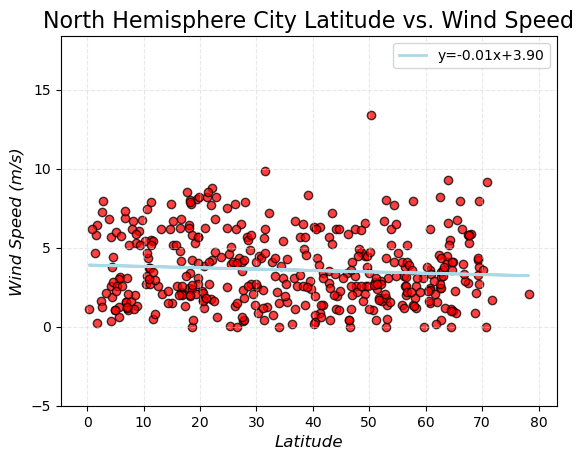

In [22]:
# Northern Hemisphere
# get axis
northern_lat = northern_hemi_df["Lat"]
northern_windspeed = northern_hemi_df["Wind Speed"]

# create canvas
plt.scatter(northern_lat, northern_windspeed, marker="o", facecolors="red", edgecolors="black",
            alpha=0.75)

# use linear regression formula to plot line of best fit
slope, intercept, r_value, p_value, std_err = linregress(northern_lat, northern_windspeed)
regression_line = slope * northern_lat + intercept

plt.plot(northern_lat, regression_line, color='lightblue', linewidth=2, label=f"y={slope:.2f}x+{intercept:.2f}")

# customize
plt.xlabel("Latitude", fontsize=12, fontstyle="italic")
plt.ylabel("Wind Speed (m/s)", fontsize=12, fontstyle="italic")
plt.title("North Hemisphere City Latitude vs. Wind Speed", fontsize=16)
plt.xlim(northern_lat.min() - 5, northern_lat.max() + 5)
plt.ylim(northern_windspeed.min() - 5, northern_windspeed.max() + 5)
plt.grid(color="lightgrey", linestyle="--", alpha=.5)
plt.legend()

# Show plot
print(f"The r-value is {r_value}")
plt.show()

y=-0.02350863331214757x + 3.492578495225496
The r-value is -0.11599826093133767


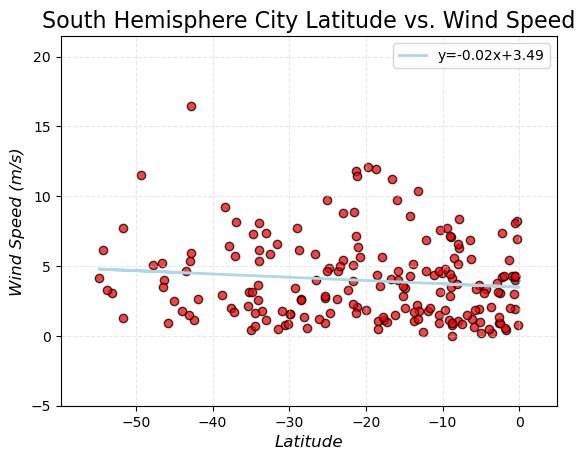

In [23]:
# Southern Hemisphere
# get axis
southern_lat = southern_hemi_df["Lat"]
southern_windspeed = southern_hemi_df["Wind Speed"]

# create canvas
plt.scatter(southern_lat, southern_windspeed, marker="o", facecolors="red", edgecolors="black",
            alpha=0.75)

# use linear regression formula to plot line of best fit
slope, intercept, r_value, p_value, std_err = linregress(southern_lat, southern_windspeed)
regression_line = slope * southern_lat + intercept

plt.plot(southern_lat, regression_line, color='lightblue', linewidth=2, label=f"y={slope:.2f}x+{intercept:.2f}")

# customize
plt.xlabel("Latitude", fontsize=12, fontstyle="italic")
plt.ylabel("Wind Speed (m/s)", fontsize=12, fontstyle="italic")
plt.title("South Hemisphere City Latitude vs. Wind Speed", fontsize=16)
plt.xlim(southern_lat.min() - 5, southern_lat.max() + 5)
plt.ylim(southern_windspeed.min() - 5, southern_windspeed.max() + 5)
plt.grid(color="lightgrey", linestyle="--", alpha=.5)
plt.legend()

# Show plot
print(f"y={slope}x + {intercept}")
print(f"The r-value is {r_value}")
plt.show()


##### Discussion about the linear relationship:
The r values in both the Northern and Southern Hemisphere are very close to 0, showing little to no relationship between the latitude of a city and wind speed. 